In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from IPython.display import display, HTML

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
df=pd.read_csv('subsidies.csv')

In [3]:
display(df)

,Unnamed: 0,Subsidies,Federal,Agricultural,Housing,Maritime,Air carriers,Other 1,State and local,RealGDP,RealGDPGrowth,NominalGDP,NominalGDPGrowth,Unemployment,Productivity,Inflation,Population,PopGrowth
0,1960.0,1.1,1.1,0.7,0.1,0.1,0.1,0.1,0.0,3108.7,2.6,543.3,4.0,5.5,1.2,1.509929,180671000,1.701993
1,1961.0,2,2.0,1.5,0.2,0.2,0.1,0.1,0.0,3188.1,2.6,563.3,3.7,6.7,3.3,1.075182,183691000,1.657730
2,1962.0,2.3,2.3,1.7,0.2,0.2,0.1,0.1,0.0,3383.1,6.1,605.1,7.4,5.5,4.5,1.116071,186538000,1.537997
3,1963.0,2.2,2.2,1.7,0.2,0.2,0.1,0.1,0.0,3530.4,4.4,638.6,5.5,5.7,3.4,1.214128,189242000,1.439165
4,1964.0,2.7,2.7,2.2,0.2,0.2,0.1,0.1,0.0,3734.0,5.8,685.8,7.4,5.2,2.9,1.308615,191889000,1.389046
5,1965.0,3,3.0,2.5,0.2,0.2,0.1,0.0,0.0,3976.7,6.5,743.7,8.4,4.5,3.2,1.668461,194303000,1.250172
6,1966.0,3.9,3.9,3.3,0.3,0.2,0.1,0.1,0.0,4238.9,6.6,815.0,9.6,3.8,3.6,2.991001,196560000,1.154893
7,1967.0,3.8,3.8,3.1,0.3,0.2,0.1,0.1,0.0,4355.2,2.7,861.7,5.7,3.8,1.9,2.775636,198712000,1.088881
8,1968.0,4.2,4.1,3.5,0.3,0.2,0.1,0.1,0.0,4569.0,4.9,942.5,9.4,3.6,3.5,4.217721,200706000,0.998461
9,1969.0,4.5,4.5,3.8,0.4,0.2,0.0,0.1,0.0,4712.5,3.1,1019.9,8.2,3.5,0.2,5.414700,202677000,0.977243


In [4]:
# Delete excess spaces imported from the csv file
df.rename(columns={'Unnamed: 0':'Year','        Subsidies':'Subsidies',
 '    Agricultural':'Agricultural',
 '    Housing':'Housing',
 '    Maritime':'Maritime',
 '    Air carriers':'Air Carriers',
 '    Other 1':'Other'}, inplace=True)

In [5]:
# Delete extraneous rows at the bottom of the data set
df=df.ix[:55]
df=df.astype(float)

In [6]:
# Change the data type for the 'Year' column to integer
df.Year=df.Year.astype(int,inplace=True)
df.head()

,Year,Subsidies,Federal,Agricultural,Housing,Maritime,Air Carriers,Other,State and local,RealGDP,RealGDPGrowth,NominalGDP,NominalGDPGrowth,Unemployment,Productivity,Inflation,Population,PopGrowth
0,1960,1.1,1.1,0.7,0.1,0.1,0.1,0.1,0.0,3108.7,2.6,543.3,4.0,5.5,1.2,1.509929,180671000.0,1.701993
1,1961,2.0,2.0,1.5,0.2,0.2,0.1,0.1,0.0,3188.1,2.6,563.3,3.7,6.7,3.3,1.075182,183691000.0,1.657730
2,1962,2.3,2.3,1.7,0.2,0.2,0.1,0.1,0.0,3383.1,6.1,605.1,7.4,5.5,4.5,1.116071,186538000.0,1.537997
3,1963,2.2,2.2,1.7,0.2,0.2,0.1,0.1,0.0,3530.4,4.4,638.6,5.5,5.7,3.4,1.214128,189242000.0,1.439165
4,1964,2.7,2.7,2.2,0.2,0.2,0.1,0.1,0.0,3734.0,5.8,685.8,7.4,5.2,2.9,1.308615,191889000.0,1.389046


In [7]:
# Add a column of subsidies percent change
df['SubChange']=df['Subsidies'].pct_change()*100
df['AgChange']=df['Agricultural'].pct_change()*100
df['HousingChange']=df['Housing'].pct_change()*100

In [8]:
df.head()

,Year,Subsidies,Federal,Agricultural,Housing,Maritime,Air Carriers,Other,State and local,RealGDP,...,NominalGDP,NominalGDPGrowth,Unemployment,Productivity,Inflation,Population,PopGrowth,SubChange,AgChange,HousingChange
0,1960,1.1,1.1,0.7,0.1,0.1,0.1,0.1,0.0,3108.7,...,543.3,4.0,5.5,1.2,1.509929,180671000.0,1.701993,NaN,NaN,NaN
1,1961,2.0,2.0,1.5,0.2,0.2,0.1,0.1,0.0,3188.1,...,563.3,3.7,6.7,3.3,1.075182,183691000.0,1.657730,81.818182,114.285714,100.0
2,1962,2.3,2.3,1.7,0.2,0.2,0.1,0.1,0.0,3383.1,...,605.1,7.4,5.5,4.5,1.116071,186538000.0,1.537997,15.000000,13.333333,0.0
3,1963,2.2,2.2,1.7,0.2,0.2,0.1,0.1,0.0,3530.4,...,638.6,5.5,5.7,3.4,1.214128,189242000.0,1.439165,-4.347826,0.000000,0.0
4,1964,2.7,2.7,2.2,0.2,0.2,0.1,0.1,0.0,3734.0,...,685.8,7.4,5.2,2.9,1.308615,191889000.0,1.389046,22.727273,29.411765,0.0


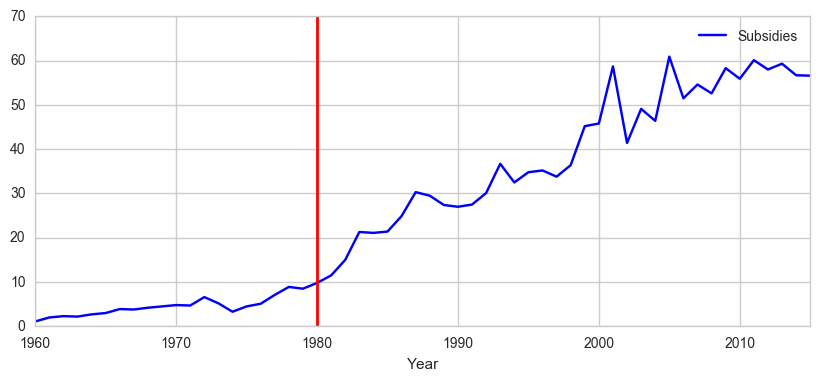

In [35]:
df.plot(x='Year',y='Subsidies',color='blue',figsize=(10,4))

plt.axvline(x=1980, linewidth=2, color='red')

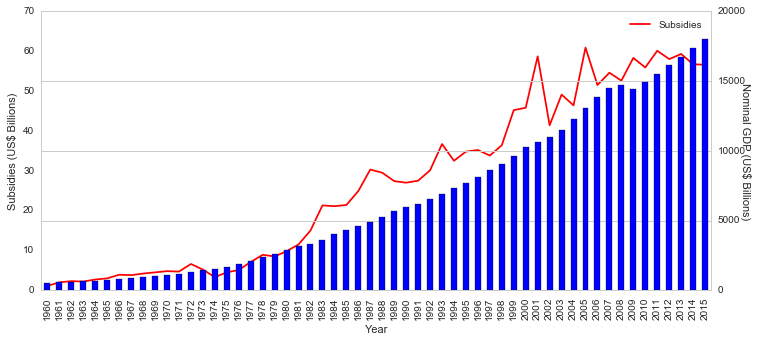

In [10]:
fig, ax = plt.subplots()
plt.hold(True)
df['Subsidies'].plot(x='Year', ax=ax, color='red',figsize=(12,5))
df['NominalGDP'].plot(x='Year',secondary_y=True, kind='bar',color='blue',ax=ax, ls='-')
ax.set_xlabel('Year')
ax.set_xticklabels(df.Year, rotation=90)
ax.set_ylabel('Subsidies (US$ Billions)')
plt.ylabel('Nominal GDP (US$ Billions)',rotation=-90)
ax.legend(loc='best')

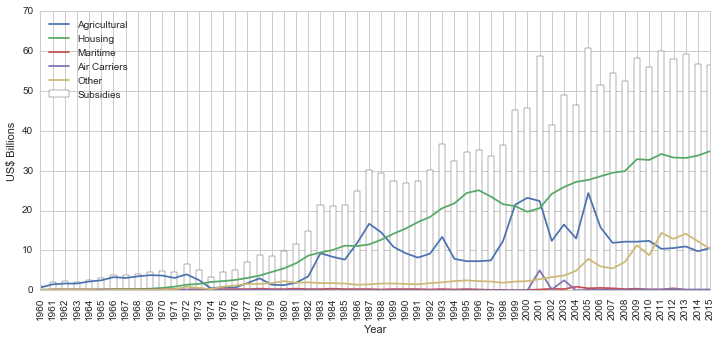

In [11]:
# Segment the data so that bars and lines can be displayed in the same figure
fig, ax = plt.subplots()
plt.hold(True)
df['Subsidies'].plot(x='Year',kind='bar', color='white', ax=ax,figsize=(12,5))
df['Agricultural'].plot(x='Year',ax=ax, ls='-')
df['Housing'].plot(x='Year',ax=ax, ls='-')
df['Maritime'].plot(x='Year',ax=ax, ls='-')
df['Air Carriers'].plot(x='Year',ax=ax, ls='-')
df['Other'].plot(x='Year',ax=ax, ls='-')
ax.set_xlabel('Year')
ax.set_xticklabels(df.Year, rotation=90)
ax.set_ylabel('US$ Billions')
ax.legend(loc='best')

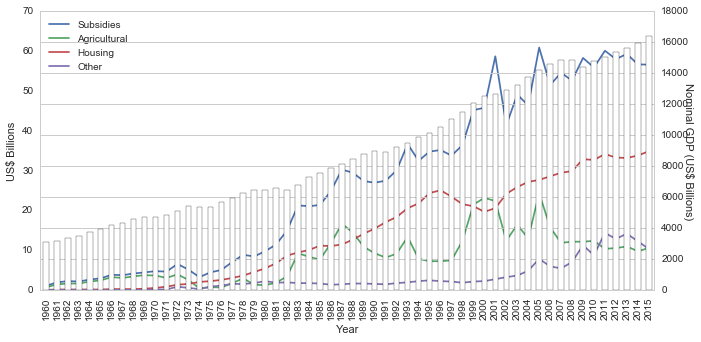

In [12]:
fig, ax = plt.subplots()
plt.hold(True)
df['Subsidies'].plot(x='Year', ax=ax,figsize=(11,5))
df['Agricultural'].plot(x='Year',ax=ax, ls='-')
df['Housing'].plot(x='Year',ax=ax, ls='-')
df['Other'].plot(x='Year',ax=ax, ls='-')
df['RealGDP'].plot(x='Year',secondary_y=True, kind='bar',color='white',ax=ax, ls='-')
ax.set_xlabel('Year')
ax.set_xticklabels(df.Year, rotation=90)
ax.set_ylabel('US$ Billions')
plt.ylabel('Nominal GDP (US$ Billions)',rotation=-90)
ax.legend(loc='best')

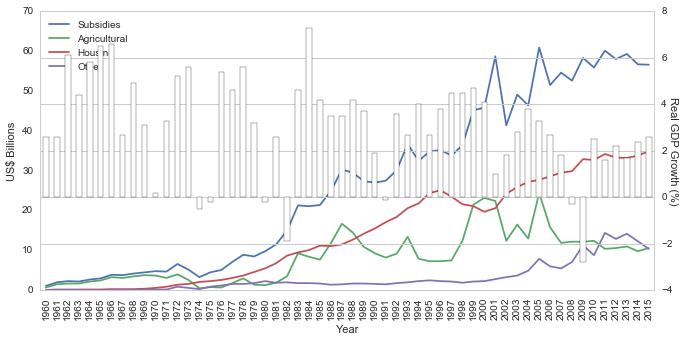

In [13]:
fig, ax = plt.subplots()
plt.hold(True)
df['Subsidies'].plot(x='Year', ax=ax,figsize=(11,5))
df['Agricultural'].plot(x='Year',ax=ax, ls='-')
df['Housing'].plot(x='Year',ax=ax, ls='-')
df['Other'].plot(x='Year',ax=ax, ls='-')
df['RealGDPGrowth'].plot(x='Year',secondary_y=True, kind='bar',color='white',ax=ax, ls='-')
ax.set_xlabel('Year')
ax.set_xticklabels(df.Year, rotation=90)
ax.set_ylabel('US$ Billions')
plt.ylabel('Real GDP Growth (%)',rotation=-90)
ax.legend(loc='best')

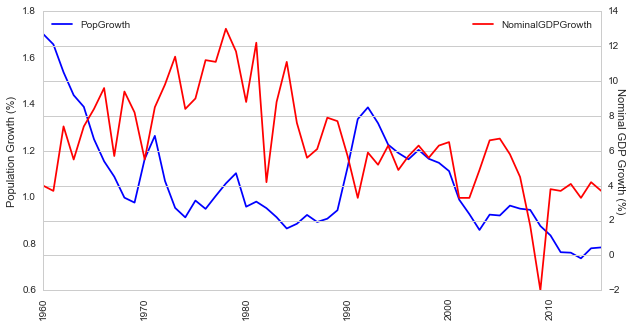

In [14]:
fig, ax = plt.subplots()
plt.hold(True)
df['PopGrowth'].plot(ax=ax,color='blue',figsize=(10,5))
df['NominalGDPGrowth'].plot(x='Year',secondary_y=True,color='red',ls='-')
ax.set_xticklabels([1960,1970,1980,1990,2000,2010], rotation=90)
ax.set_ylabel('Population Growth (%)')
plt.ylabel('Nominal GDP Growth (%)',rotation=-90)
ax.legend(loc='upper left')
plt.legend(loc='best')

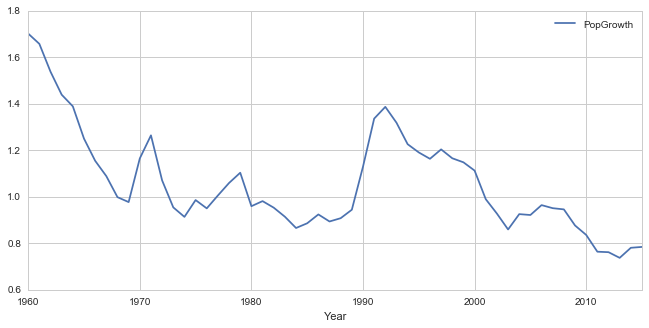

In [15]:
df.plot(x='Year', y='PopGrowth',figsize=(11,5))

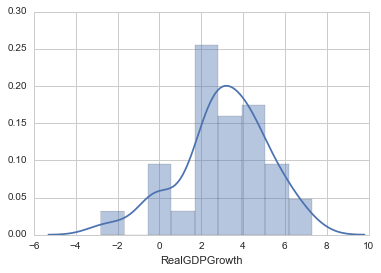

In [16]:
sns.distplot(df['RealGDPGrowth'])

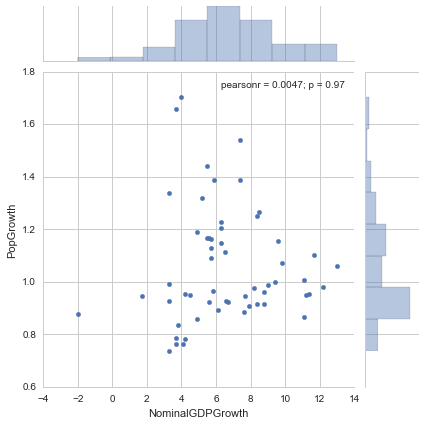

In [17]:
sns.jointplot('NominalGDPGrowth','PopGrowth',df,kind='scatter')

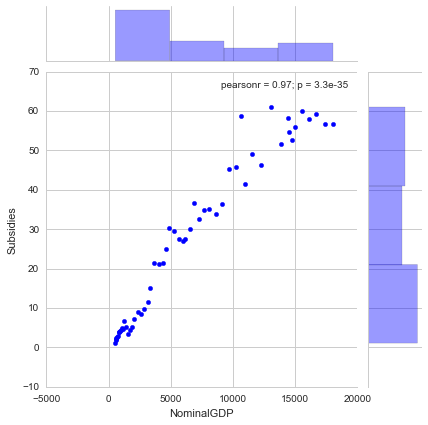

In [18]:
sns.jointplot('NominalGDP','Subsidies',df,color='blue',kind='scatter')

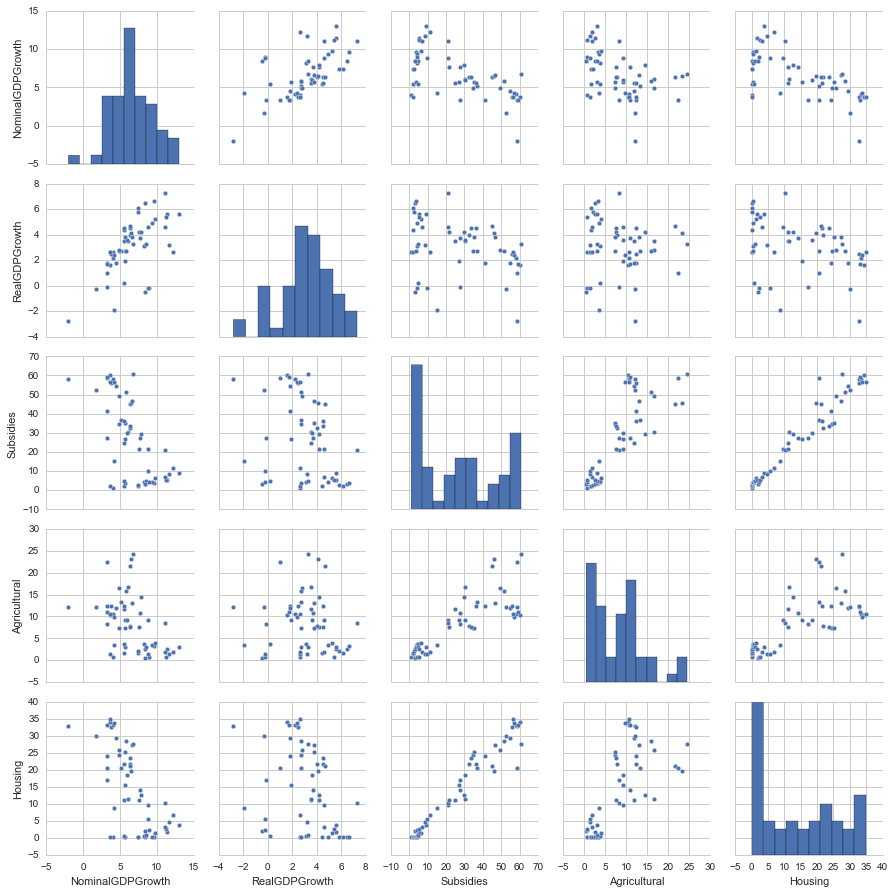

In [19]:
sns.pairplot(data=df[['NominalGDPGrowth','RealGDPGrowth', 'Subsidies','Agricultural','Housing']])

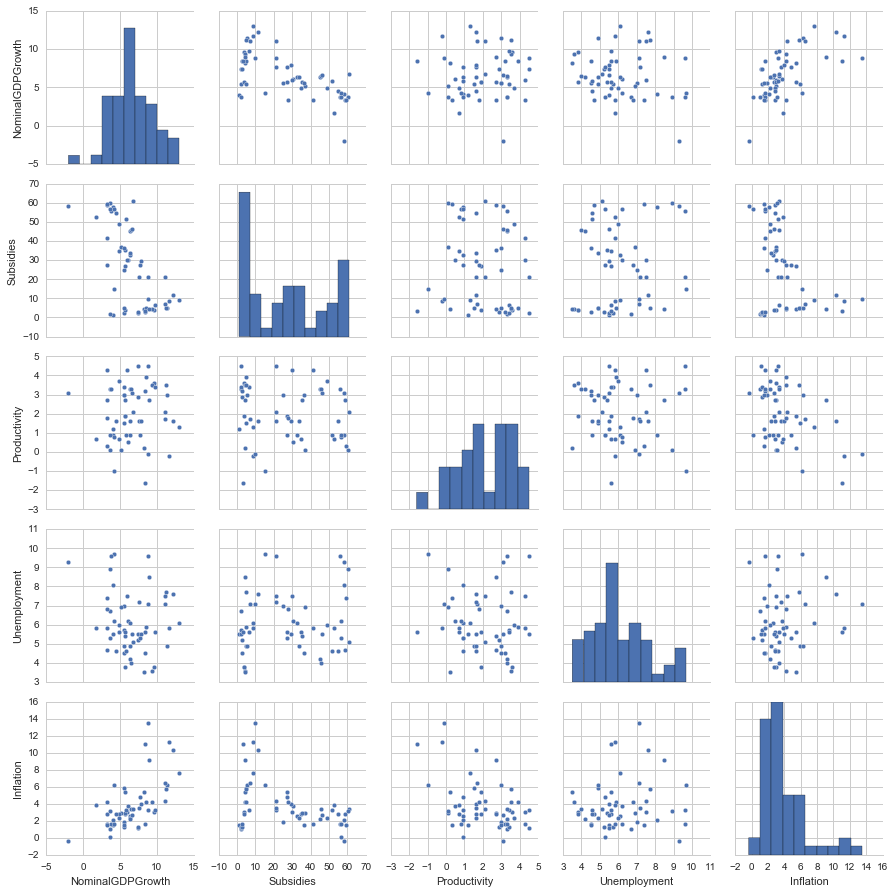

In [20]:
sns.pairplot(data=df[['NominalGDPGrowth','Subsidies','Productivity','Unemployment','Inflation']])

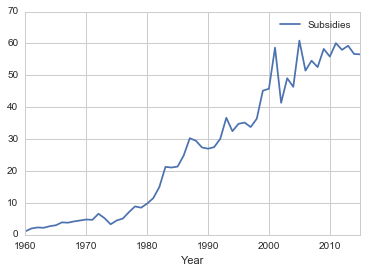

In [21]:
df.plot(x='Year', y='Subsidies')

In [22]:
# To enable OLS regressions
import statsmodels.formula.api as smf
import patsy

In [23]:
# Slice the data to analyse data from 1980 onward
late=df.loc[df['Year']>=1980]
display(late)

,Year,Subsidies,Federal,Agricultural,Housing,Maritime,Air Carriers,Other,State and local,RealGDP,...,NominalGDP,NominalGDPGrowth,Unemployment,Productivity,Inflation,Population,PopGrowth,SubChange,AgChange,HousingChange
20,1980,9.8,9.4,1.3,5.5,0.3,0.1,2.3,0.4,6450.4,...,2862.5,8.8,7.1,-0.1,13.509370,227225000.0,0.959590,15.294118,-7.142857,19.565217
21,1981,11.5,11.1,1.9,6.8,0.4,0.1,1.9,0.4,6617.7,...,3211.0,12.2,7.6,1.6,10.315534,229466000.0,0.981415,17.346939,46.153846,23.636364
22,1982,15.0,14.6,3.5,8.7,0.3,0.1,2.0,0.5,6491.3,...,3345.0,4.2,9.7,-1.0,6.160616,231664000.0,0.953318,30.434783,84.210526,27.941176
23,1983,21.3,20.9,9.3,9.5,0.3,0.0,1.8,0.4,6792.0,...,3638.1,8.8,9.6,4.5,3.212435,233792000.0,0.914379,42.000000,165.714286,9.195402
24,1984,21.1,20.7,8.4,10.1,0.4,0.0,1.8,0.4,7285.0,...,4040.7,11.1,7.5,2.1,4.317269,235825000.0,0.865817,-0.938967,-9.677419,6.315789
25,1985,21.4,21.0,7.7,11.2,0.3,0.0,1.7,0.3,7593.8,...,4346.7,7.6,7.2,1.6,3.561116,237924000.0,0.886129,1.421801,-8.333333,10.891089
26,1986,24.9,24.6,11.8,11.1,0.3,0.0,1.4,0.3,7860.5,...,4590.2,5.6,7.0,3.0,1.858736,240133000.0,0.924164,16.355140,53.246753,-0.892857
27,1987,30.3,30.0,16.7,11.5,0.3,0.0,1.5,0.3,8132.6,...,4870.2,6.1,6.2,0.5,3.740876,242289000.0,0.893829,21.686747,41.525424,3.603604
28,1988,29.5,29.2,14.5,12.7,0.2,0.0,1.7,0.4,8474.5,...,5252.6,7.9,5.5,1.6,4.009088,244499000.0,0.907999,-2.640264,-13.173653,10.434783
29,1989,27.4,27.1,10.9,14.2,0.3,0.0,1.7,0.4,8786.4,...,5657.7,7.7,5.3,0.9,4.827003,246819000.0,0.944406,-7.118644,-24.827586,11.811024


In [24]:
# Slice the data to analyse data prior to 1980
early=df.loc[df['Year']<=1979]
display(early)

,Year,Subsidies,Federal,Agricultural,Housing,Maritime,Air Carriers,Other,State and local,RealGDP,...,NominalGDP,NominalGDPGrowth,Unemployment,Productivity,Inflation,Population,PopGrowth,SubChange,AgChange,HousingChange
0,1960,1.1,1.1,0.7,0.1,0.1,0.1,0.1,0.0,3108.7,...,543.3,4.0,5.5,1.2,1.509929,180671000.0,1.701993,NaN,NaN,NaN
1,1961,2.0,2.0,1.5,0.2,0.2,0.1,0.1,0.0,3188.1,...,563.3,3.7,6.7,3.3,1.075182,183691000.0,1.657730,81.818182,114.285714,100.000000
2,1962,2.3,2.3,1.7,0.2,0.2,0.1,0.1,0.0,3383.1,...,605.1,7.4,5.5,4.5,1.116071,186538000.0,1.537997,15.000000,13.333333,0.000000
3,1963,2.2,2.2,1.7,0.2,0.2,0.1,0.1,0.0,3530.4,...,638.6,5.5,5.7,3.4,1.214128,189242000.0,1.439165,-4.347826,0.000000,0.000000
4,1964,2.7,2.7,2.2,0.2,0.2,0.1,0.1,0.0,3734.0,...,685.8,7.4,5.2,2.9,1.308615,191889000.0,1.389046,22.727273,29.411765,0.000000
5,1965,3.0,3.0,2.5,0.2,0.2,0.1,0.0,0.0,3976.7,...,743.7,8.4,4.5,3.2,1.668461,194303000.0,1.250172,11.111111,13.636364,0.000000
6,1966,3.9,3.9,3.3,0.3,0.2,0.1,0.1,0.0,4238.9,...,815.0,9.6,3.8,3.6,2.991001,196560000.0,1.154893,30.000000,32.000000,50.000000
7,1967,3.8,3.8,3.1,0.3,0.2,0.1,0.1,0.0,4355.2,...,861.7,5.7,3.8,1.9,2.775636,198712000.0,1.088881,-2.564103,-6.060606,0.000000
8,1968,4.2,4.1,3.5,0.3,0.2,0.1,0.1,0.0,4569.0,...,942.5,9.4,3.6,3.5,4.217721,200706000.0,0.998461,10.526316,12.903226,0.000000
9,1969,4.5,4.5,3.8,0.4,0.2,0.0,0.1,0.0,4712.5,...,1019.9,8.2,3.5,0.2,5.414700,202677000.0,0.977243,7.142857,8.571429,33.333333


In [25]:
# Just checking on what I have installed on my computer
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit: None
python: 2.7.11.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 69 Stepping 1, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None

pandas: 0.18.0
nose: 1.3.7
pip: 9.0.1
setuptools: 20.3
Cython: 0.23.4
numpy: 1.11.2
scipy: 0.18.1
statsmodels: 0.6.1
xarray: None
IPython: 4.1.2
sphinx: 1.3.5
patsy: 0.4.1
dateutil: 2.5.1
pytz: 2016.2
blosc: None
bottleneck: 1.0.0
tables: 3.2.2
numexpr: 2.6.1
matplotlib: 1.5.1
openpyxl: 2.3.2
xlrd: 0.9.4
xlwt: 1.0.0
xlsxwriter: 0.8.4
lxml: 3.6.0
bs4: 4.4.1
html5lib: None
httplib2: None
apiclient: None
sqlalchemy: 1.0.12
pymysql: None
psycopg2: None
jinja2: 2.8
boto: 2.39.0


In [28]:
reg1 = smf.ols(formula='NominalGDPGrowth ~ Subsidies + Housing + Agricultural', data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NominalGDPGrowth   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     12.61
Date:                Tue, 17 Jan 2017   Prob (F-statistic):           2.60e-06
Time:                        10:06:08   Log-Likelihood:                -123.31
No. Observations:                  56   AIC:                             254.6
Df Residuals:                      52   BIC:                             262.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        8.7657      0.518     16.907      0.000         7.725     9.806
Subsidies       -0.0874      0.117     -0.749      0.457        -0.322     0.147
Housing         -0.0385      0.160     -0.240      0.812        -0.361     0.284
Agricultural     0.0859      0.128      0.670      0.506        -0.171     0.343
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.887
Skew:                          -0.267   Prob(JB):                        0.642
Kurtosis:                       3.308   Cond. No.                         68.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
reg2 = smf.ols(formula='RealGDPGrowth ~ Subsidies + Housing + Agricultural', data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          RealGDPGrowth   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     4.327
Date:                Tue, 17 Jan 2017   Prob (F-statistic):            0.00850
Time:                        10:06:08   Log-Likelihood:                -114.39
No. Observations:                  56   AIC:                             236.8
Df Residuals:                      52   BIC:                             244.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        3.6060      0.442      8.155      0.000         2.719     4.493
Subsidies       -0.1912      0.100     -1.920      0.060        -0.391     0.009
Housing          0.1668      0.137      1.218      0.229        -0.108     0.441
Agricultural     0.2684      0.109      2.454      0.018         0.049     0.488
==============================================================================
Omnibus:                        5.930   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.179
Skew:                          -0.731   Prob(JB):                       0.0751
Kurtosis:                       3.287   Cond. No.                         68.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
reg3 = smf.ols(formula='Unemployment ~ Subsidies + Housing + Agricultural + NominalGDPGrowth', data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     2.797
Date:                Tue, 17 Jan 2017   Prob (F-statistic):             0.0355
Time:                        10:06:08   Log-Likelihood:                -98.598
No. Observations:                  56   AIC:                             207.2
Df Residuals:                      51   BIC:                             217.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            6.1637      0.858      7.181      0.000         4.440     7.887
Subsidies            0.1002      0.076      1.314      0.195        -0.053     0.253
Housing             -0.0671      0.104     -0.643      0.523        -0.277     0.142
Agricultural        -0.2118      0.084     -2.532      0.014        -0.380    -0.044
NominalGDPGrowth    -0.0075      0.090     -0.083      0.934        -0.188     0.173
==============================================================================
Omnibus:                        3.808   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.231
Skew:                           0.587   Prob(JB):                        0.199
Kurtosis:                       3.073   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
reg4 = smf.ols(formula='NominalGDPGrowth ~ Productivity + Subsidies + Unemployment + Inflation + PopGrowth', data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NominalGDPGrowth   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     20.46
Date:                Tue, 17 Jan 2017   Prob (F-statistic):           4.62e-11
Time:                        10:06:08   Log-Likelihood:                -107.43
No. Observations:                  56   AIC:                             226.9
Df Residuals:                      50   BIC:                             239.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       12.0004      2.506      4.788      0.000         6.966    17.035
Productivity     0.5647      0.193      2.932      0.005         0.178     0.952
Subsidies       -0.0734      0.017     -4.273      0.000        -0.108    -0.039
Unemployment    -0.3420      0.157     -2.184      0.034        -0.657    -0.028
Inflation        0.4868      0.122      3.990      0.000         0.242     0.732
PopGrowth       -4.1453      1.460     -2.839      0.007        -7.078    -1.212
==============================================================================
Omnibus:                        2.119   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.558
Skew:                          -0.405   Prob(JB):                        0.459
Kurtosis:                       3.115   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
reg5 = smf.ols(formula='NominalGDPGrowth ~ Productivity + Subsidies + Unemployment + Inflation', data=early).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NominalGDPGrowth   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     12.53
Date:                Tue, 17 Jan 2017   Prob (F-statistic):           0.000112
Time:                        10:06:08   Log-Likelihood:                -32.300
No. Observations:                  20   AIC:                             74.60
Df Residuals:                      15   BIC:                             79.58
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        2.7723      1.543      1.797      0.093        -0.517     6.061
Productivity     0.7903      0.321      2.460      0.026         0.106     1.475
Subsidies        0.7539      0.217      3.481      0.003         0.292     1.216
Unemployment    -0.3030      0.281     -1.080      0.297        -0.901     0.295
Inflation        0.4566      0.203      2.248      0.040         0.024     0.890
==============================================================================
Omnibus:                        4.746   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.956
Skew:                          -0.923   Prob(JB):                        0.228
Kurtosis:                       3.375   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
reg6 = smf.ols(formula='NominalGDPGrowth ~ Productivity + Subsidies + Unemployment + Inflation', data=late).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NominalGDPGrowth   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     9.411
Date:                Tue, 17 Jan 2017   Prob (F-statistic):           4.23e-05
Time:                        10:06:08   Log-Likelihood:                -69.826
No. Observations:                  36   AIC:                             149.7
Df Residuals:                      31   BIC:                             157.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        8.9244      2.314      3.856      0.001         4.204    13.645
Productivity     0.3003      0.243      1.235      0.226        -0.196     0.796
Subsidies       -0.0770      0.028     -2.795      0.009        -0.133    -0.021
Unemployment    -0.3380      0.195     -1.734      0.093        -0.735     0.060
Inflation        0.3726      0.178      2.092      0.045         0.009     0.736
==============================================================================
Omnibus:                        1.414   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                0.685
Skew:                          -0.315   Prob(JB):                        0.710
Kurtosis:                       3.243   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""